In [74]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import os
import joblib
from sklearn.preprocessing import MinMaxScaler
from main.utils.data_manage_utils import load_processed_data_by_folder, save_processed_data_to_folder
from main.utils.time_utils import print_time

# Variables
ROOT_PATH = os.path.abspath("../../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/base/")

In [75]:
X_train, y_train, X_test, y_test = load_processed_data_by_folder(os.path.join(INPUT_FOLDER, "reg"))

print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))
print("X_train table: ")
X_train

Shape of X_train: (263204, 45)
Shape of y_train: (263204,)
Shape of X_test: (65801, 45)
Shape of y_test: (65801,)
X_train table: 


,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5998106,-11.0,-11.0,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,...,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0
9744846,-11.0,-11.0,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,...,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0
8656393,-11.0,-9.0,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,...,0,0,3,0,2,0.0,3.0,0.0,0.0,3.0
7404998,-11.0,-8.0,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,...,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0
8855927,-11.0,-5.0,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,...,0,0,0,2,0,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6.0,-9.0,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,...,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0
7551519,-11.0,-15.0,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7375452,-11.0,-8.0,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,...,0,2,2,2,2,0.0,0.0,3.0,0.0,0.0
7757994,-6.0,-8.0,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0


In [76]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

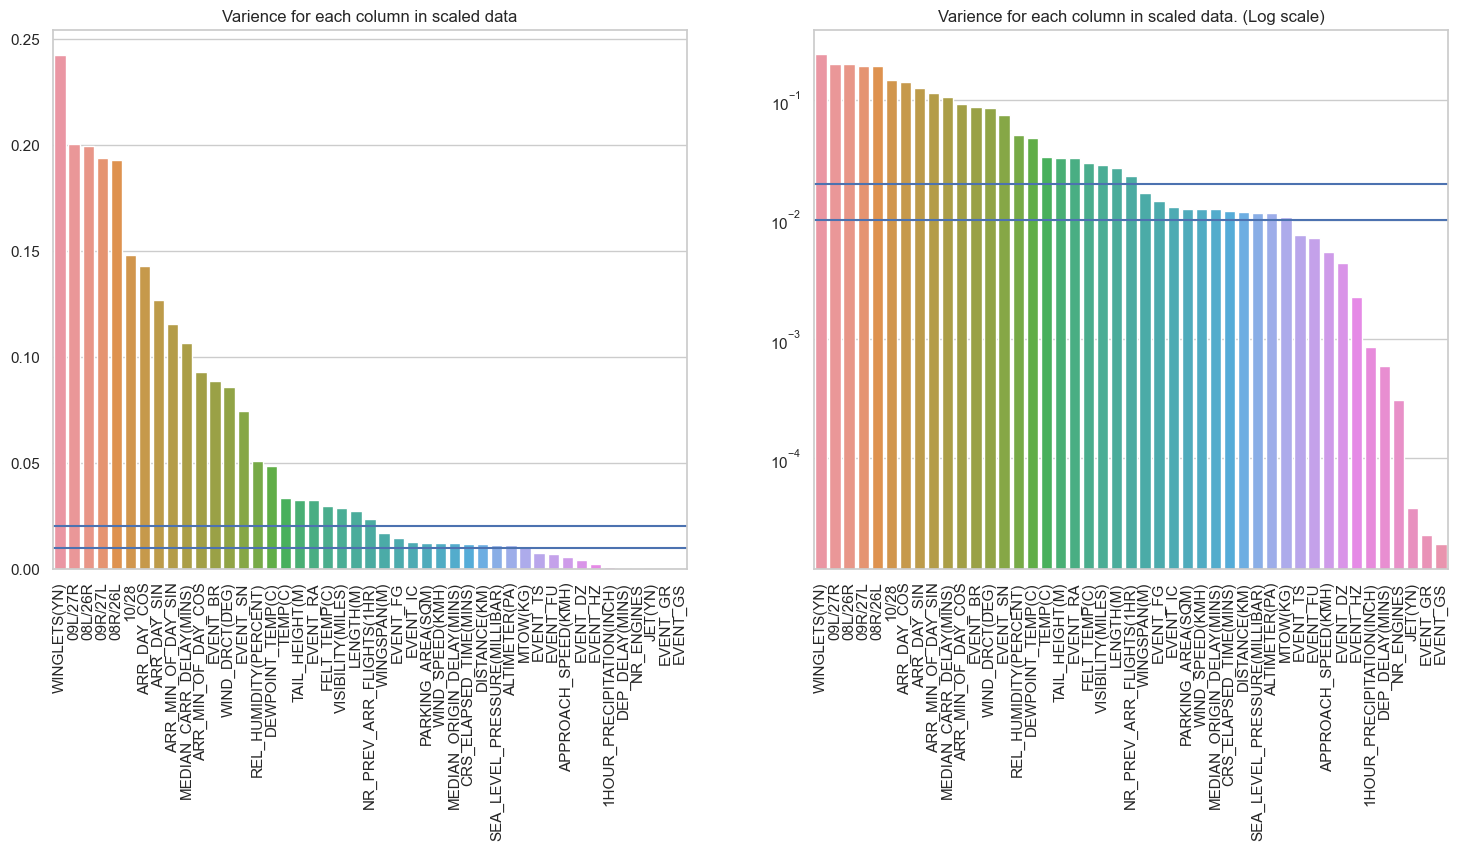

In [77]:
fig, axes = plt.subplots(1,2,figsize=(18,7))
var = pd.DataFrame(X_train_scaled, columns=X_train.columns).var().sort_values(ascending=False)
sns.set(style="whitegrid")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[0].set_title("Varience for each column in scaled data")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[1].set_yscale("log")
axes[1].set_title("Varience for each column in scaled data. (Log scale)")
axes[0].axhline(0.01)
axes[1].axhline(0.01)
axes[0].axhline(0.02)
axes[1].axhline(0.02)
plt.show()

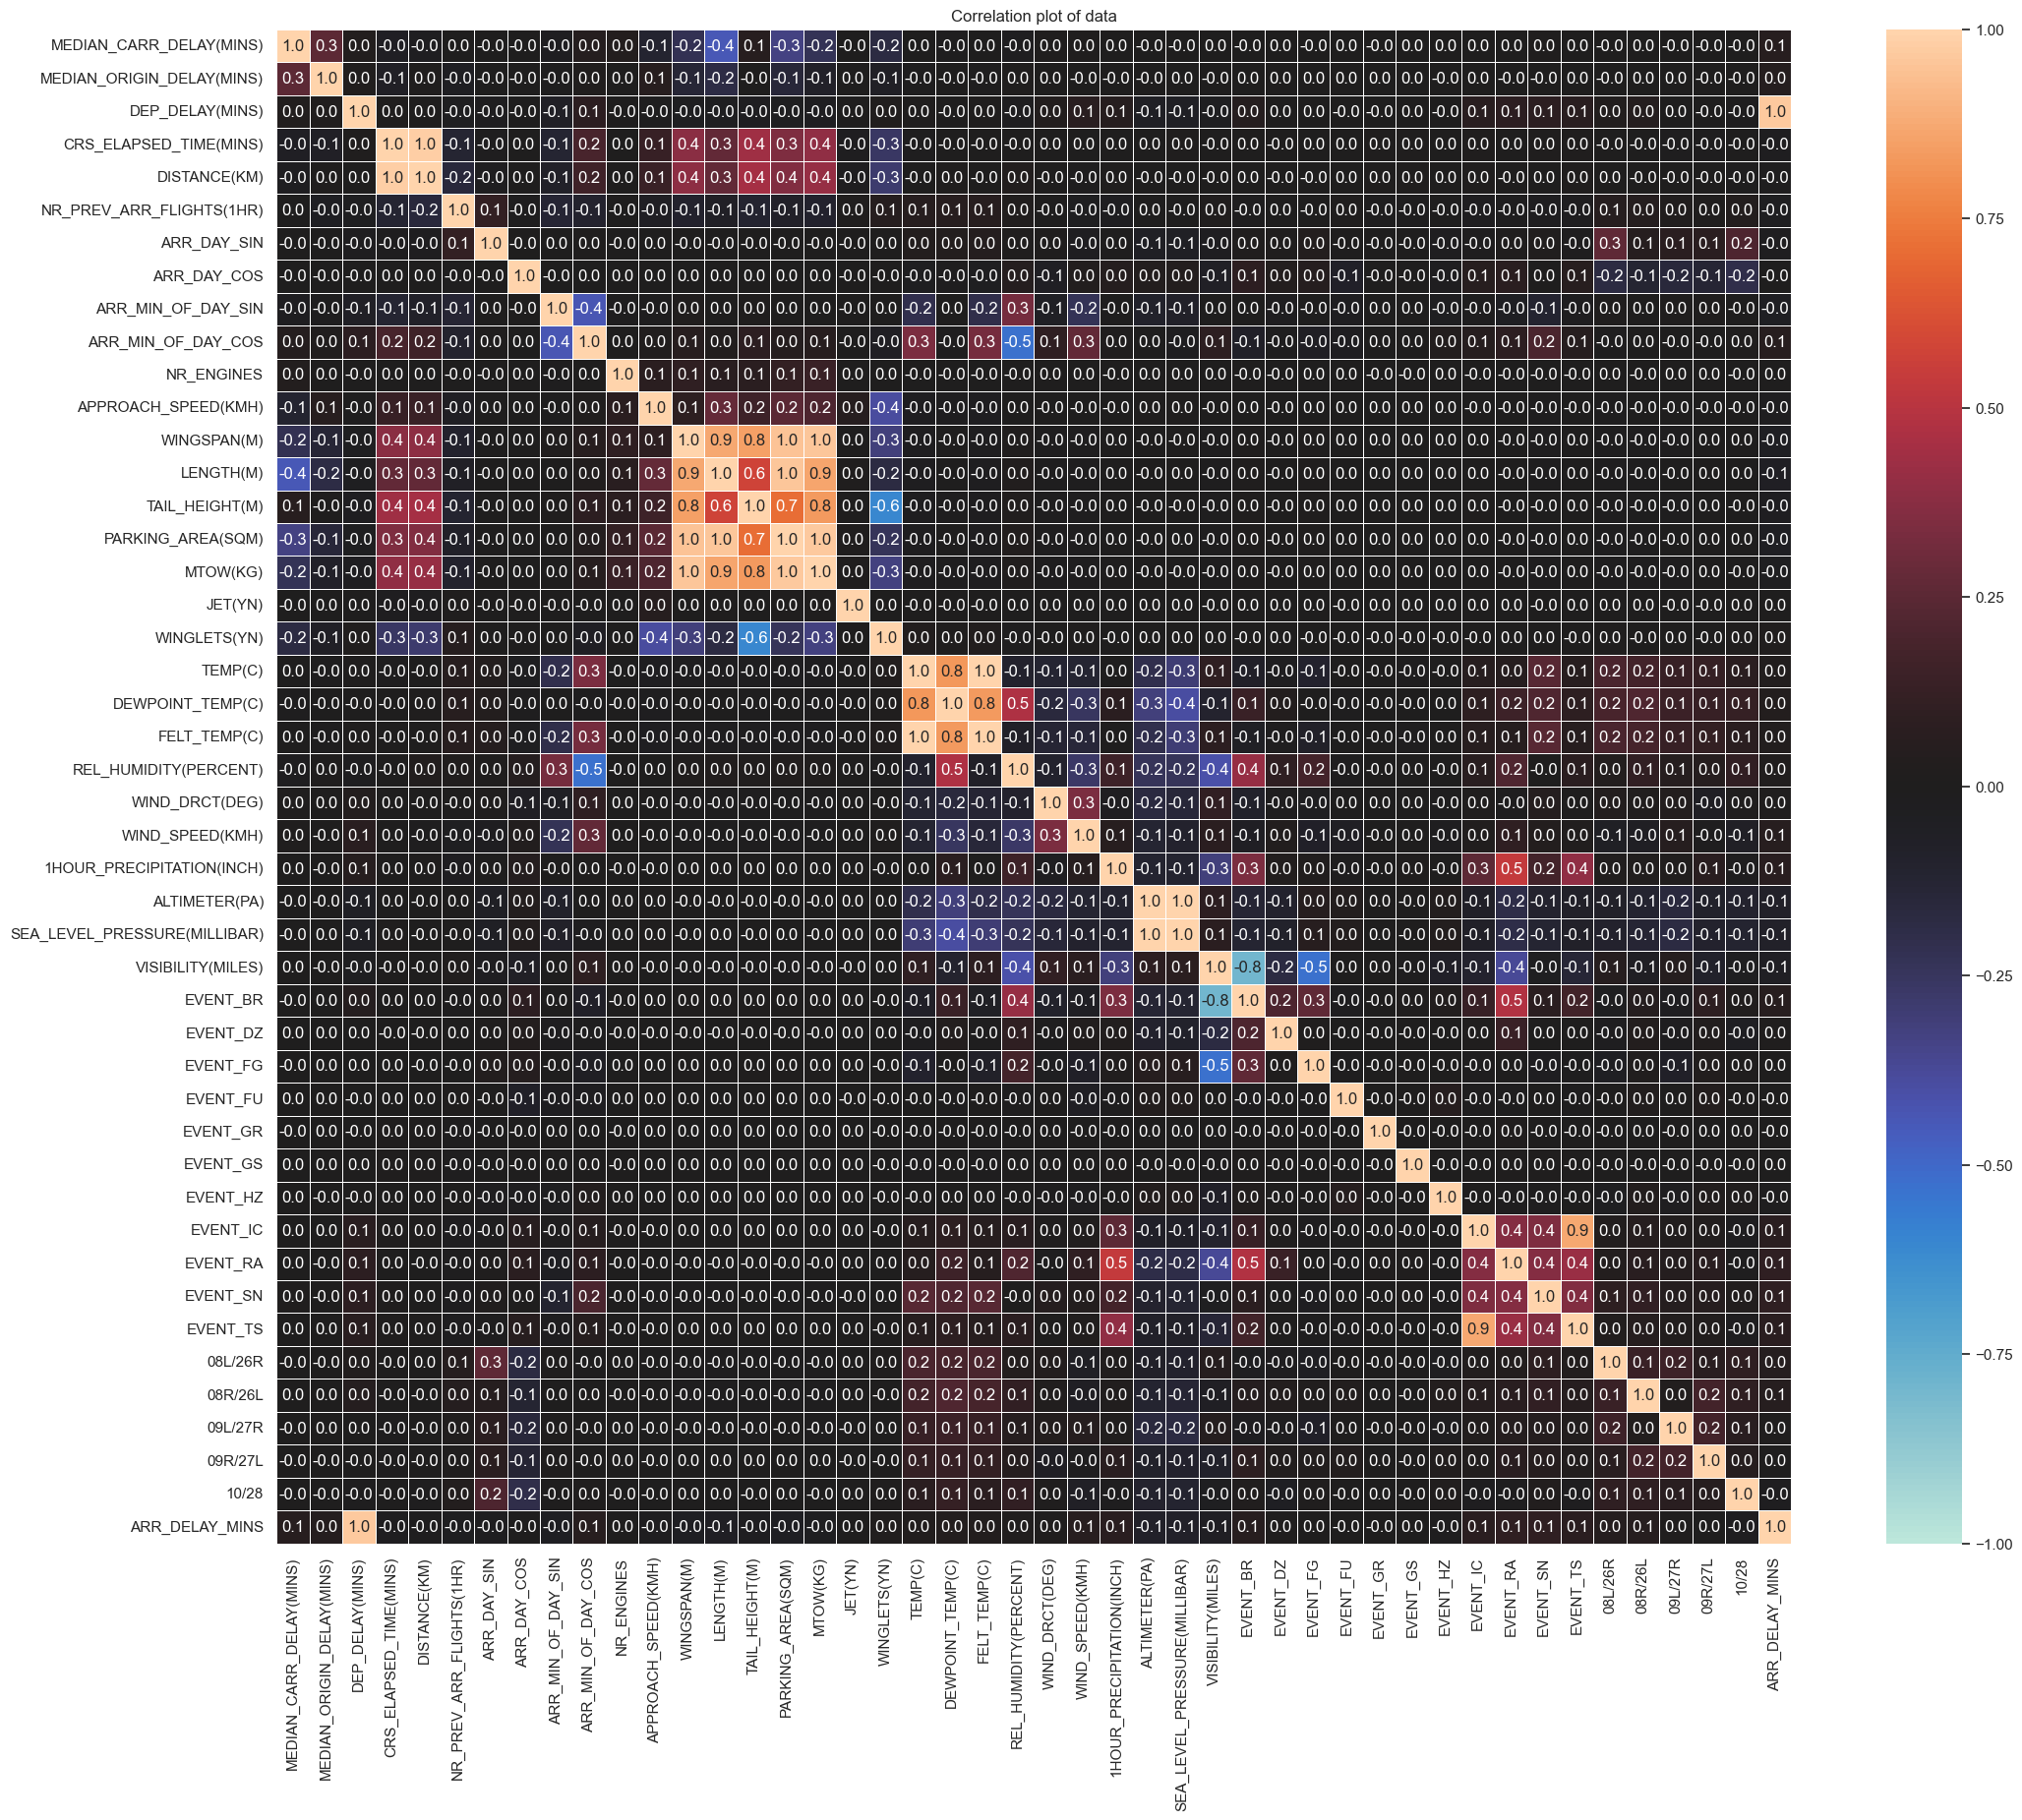

In [78]:
fig, ax = plt.subplots(figsize=(25,20))
ax.set_title("Correlation plot of data")
g = sns.heatmap(pd.concat([X_train, y_train], axis="columns").corr(), center = 0, square=True, linewidths=.5, cbar=True, vmin=-1, vmax=1, annot=True, ax = ax, fmt=".1f")

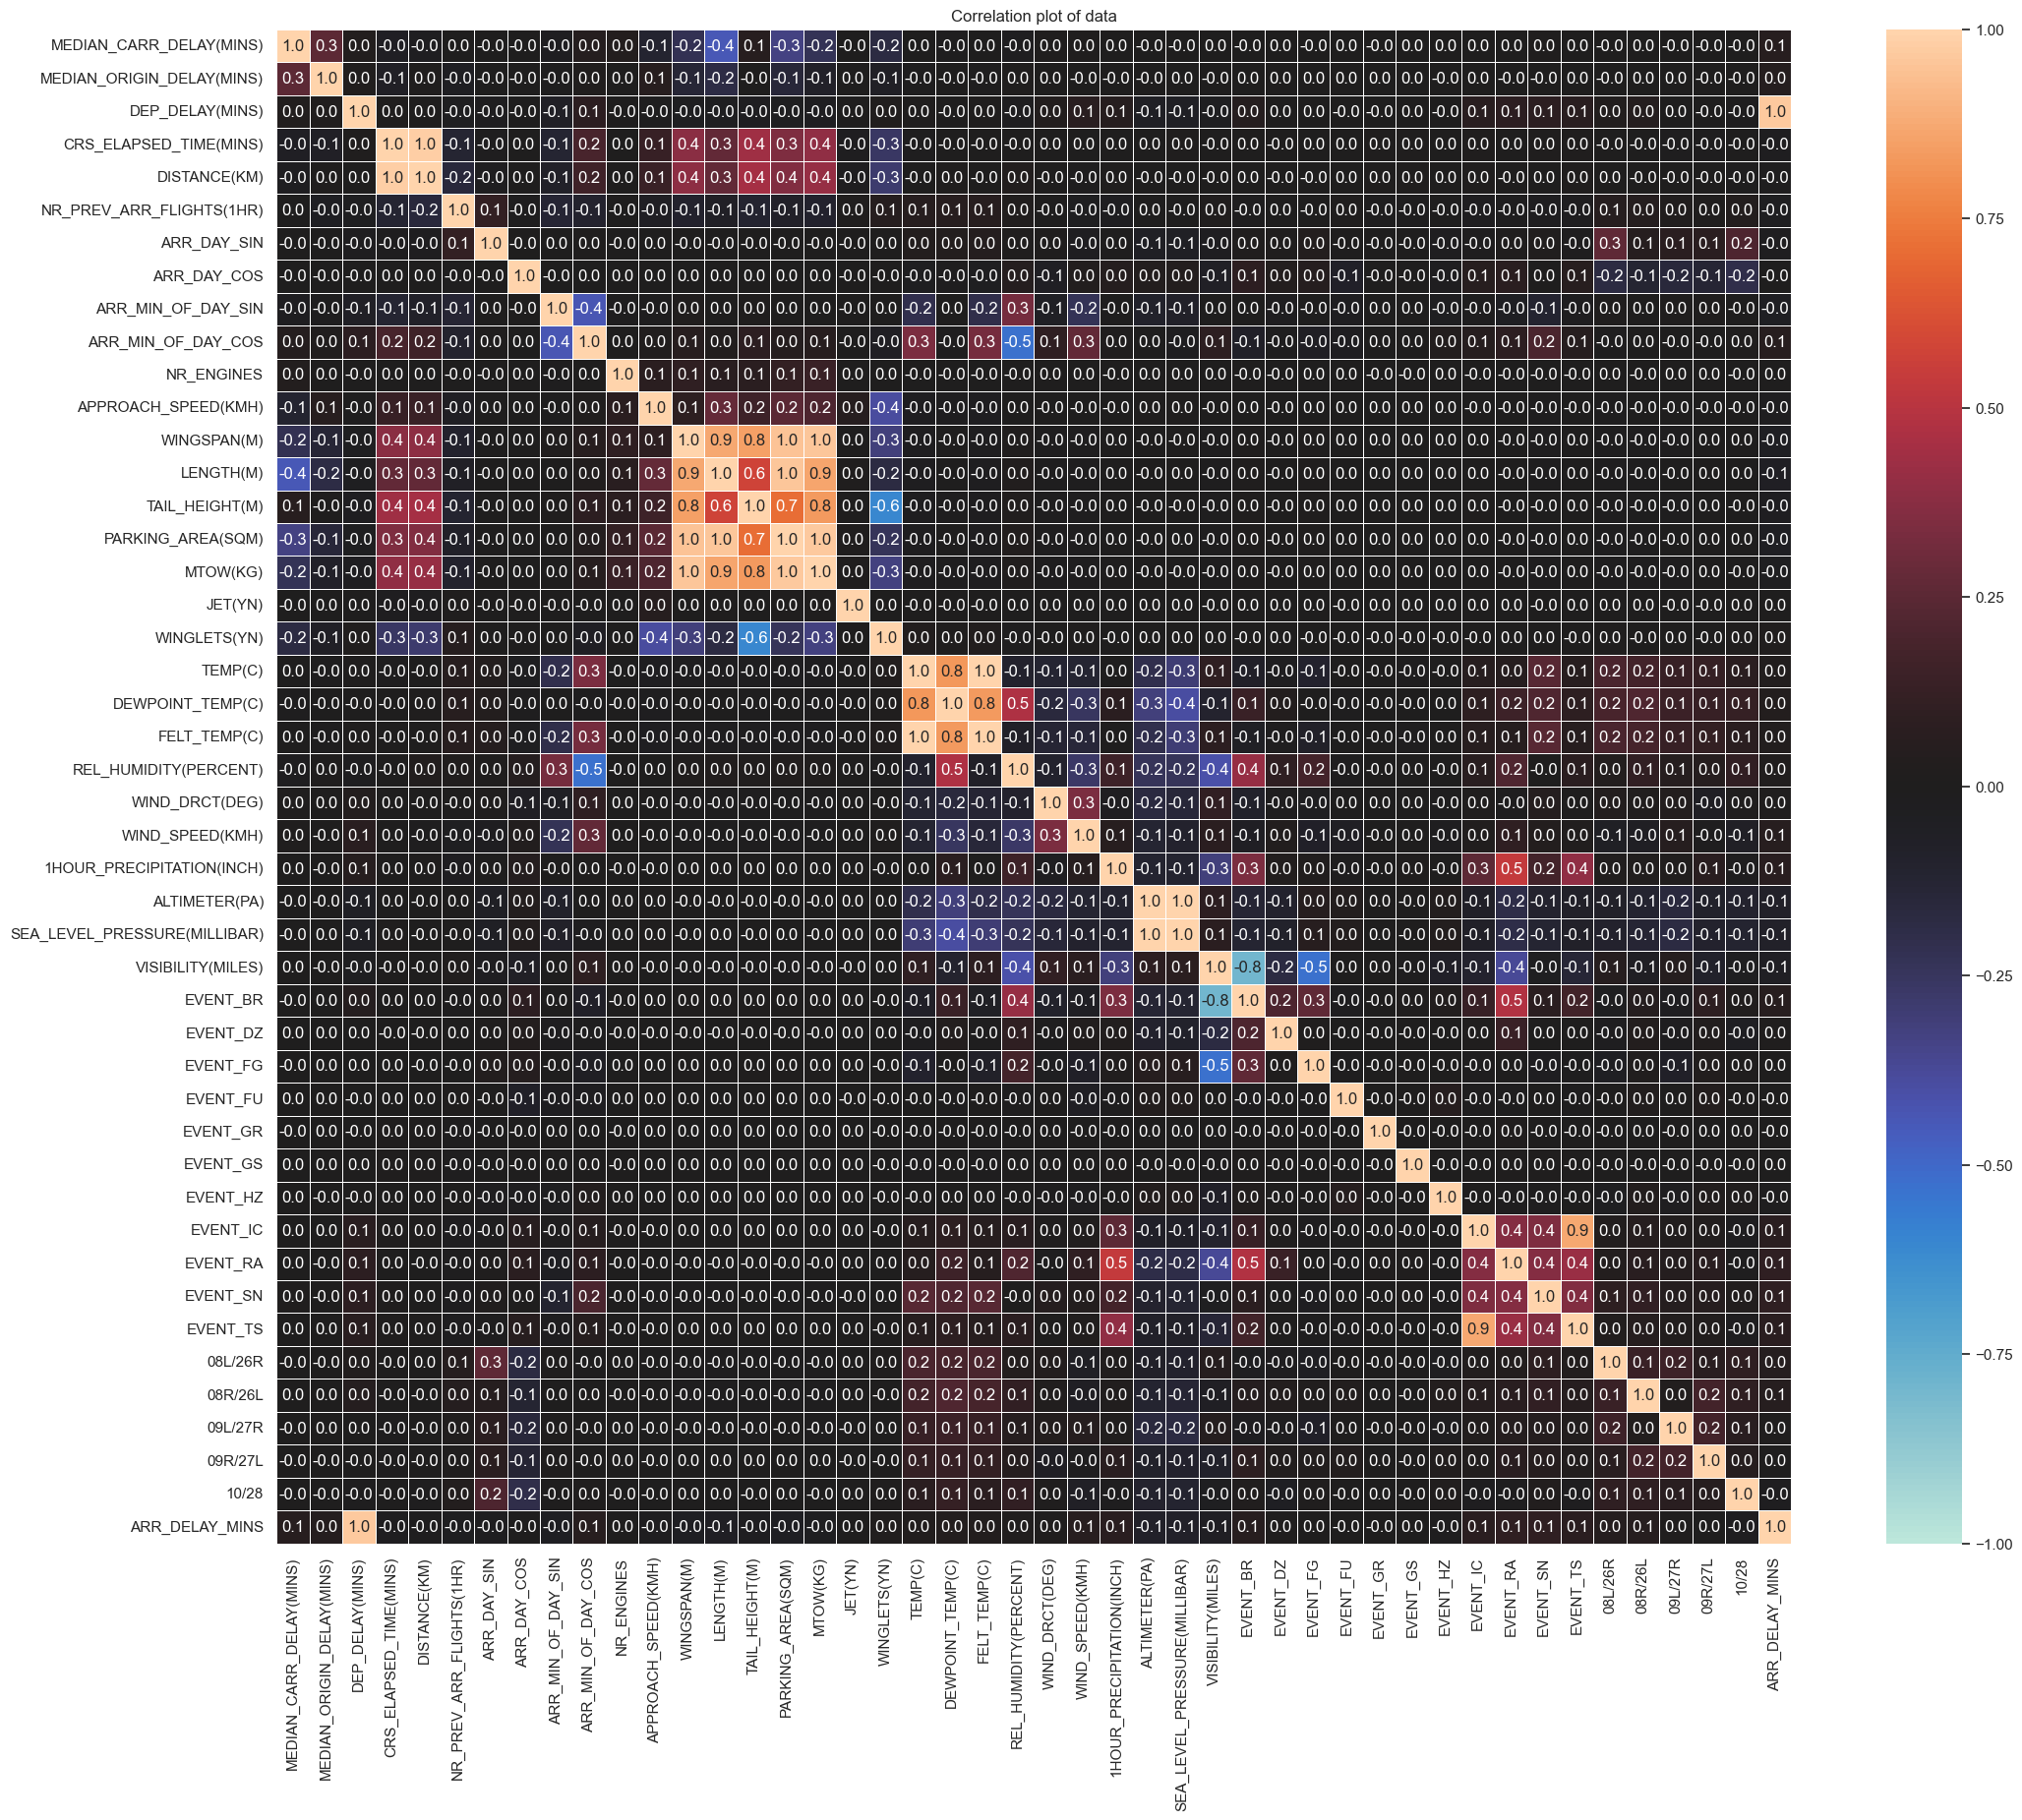

In [79]:
fig, ax = plt.subplots(figsize=(25,20))
ax.set_title("Correlation plot of data")
data_scaled = X_train_scaled.copy()
data_scaled = np.hstack((data_scaled, y_train.to_numpy().reshape(-1,1)))
cols = list(X_train.columns)
cols.append(y_train.name)
g = sns.heatmap(pd.DataFrame(data_scaled, columns=cols).corr(), center = 0, square=True, linewidths=.5, cbar=True, vmin=-1, vmax=1, annot=True, ax = ax, fmt=".1f")

In [64]:
X_train, y_train, X_test, y_test = load_processed_data_by_folder(os.path.join(INPUT_FOLDER, "class"))

print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))
print("X_train table: ")
y_train

Shape of X_train: (263204, 45)
Shape of y_train: (263204,)
Shape of X_test: (65801, 45)
Shape of y_test: (65801,)
X_train table: 


5998106    2
9744846    1
8656393    2
7404998    0
8855927    2
          ..
6033952    0
7551519    0
7375452    1
7757994    2
7249134    1
Name: ARR_DELAY_CATS, Length: 263204, dtype: category
Categories (3, int64): [0 < 1 < 2]

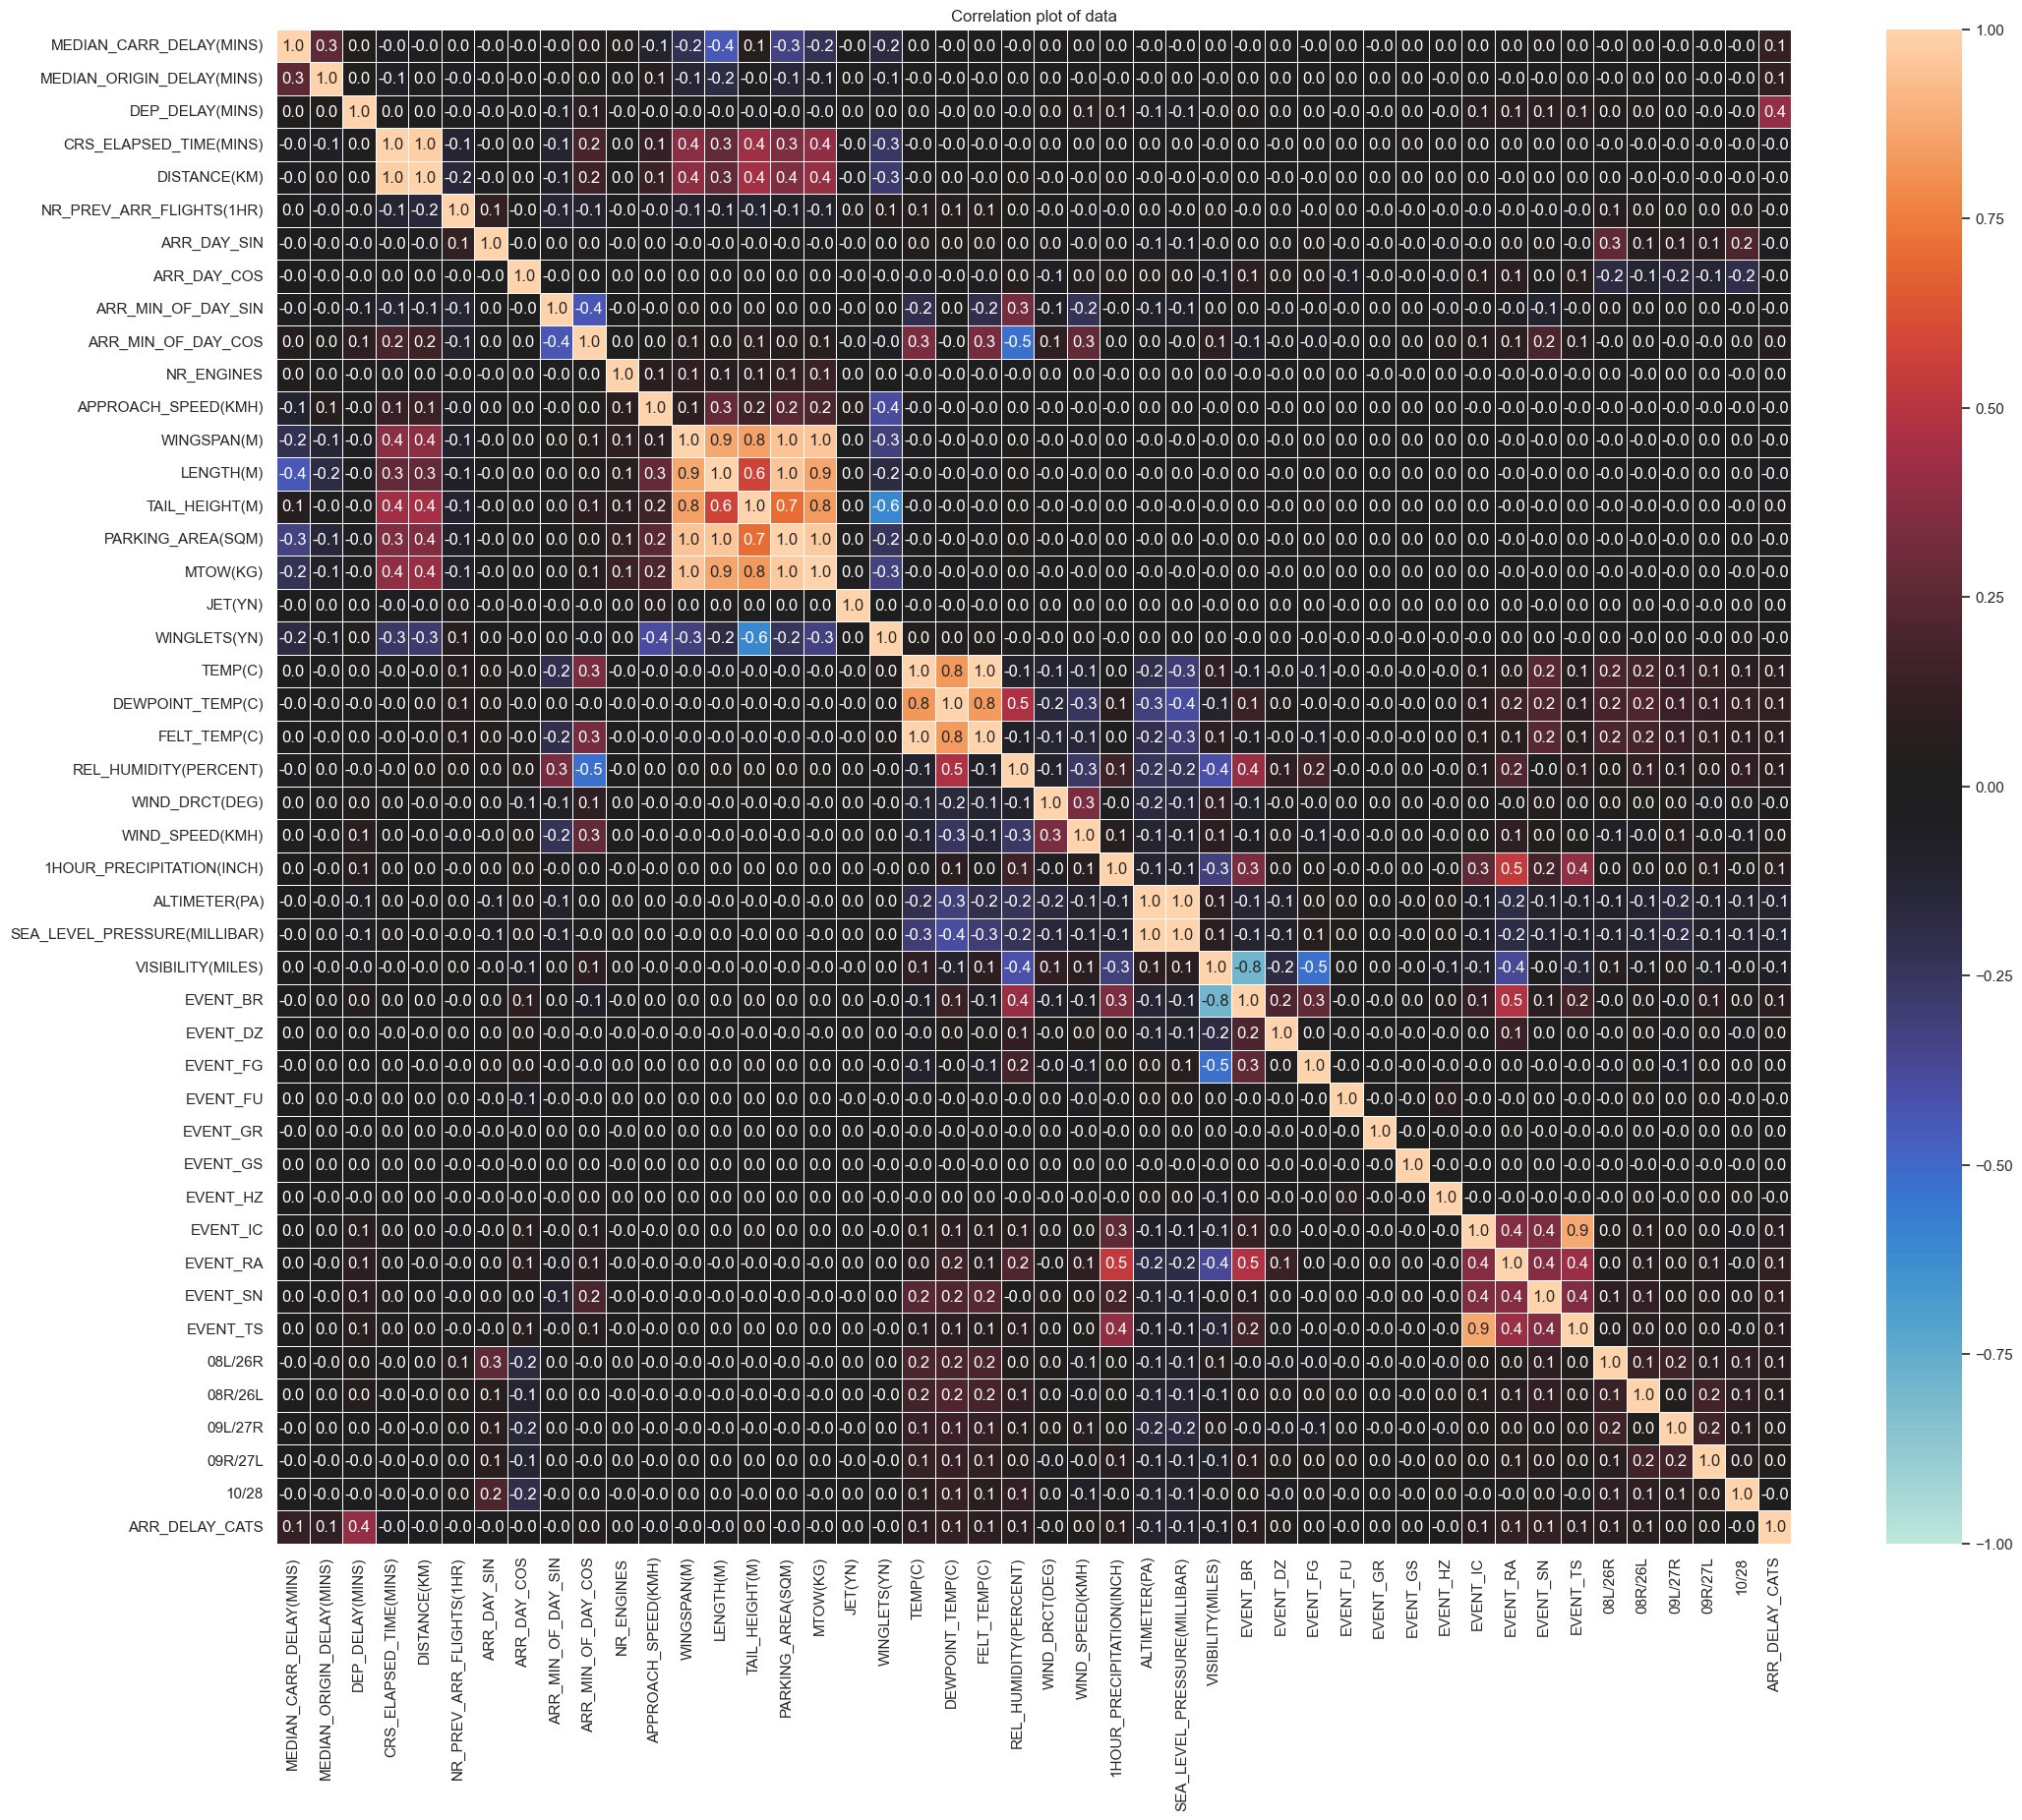

In [65]:
fig, ax = plt.subplots(figsize=(25,20))
ax.set_title("Correlation plot of data")
g = sns.heatmap(pd.concat([X_train, y_train.astype(int)], axis="columns").corr(), center = 0, square=True, linewidths=.5, cbar=True, vmin=-1, vmax=1, annot=True, ax = ax, fmt=".1f")